In [39]:
print("Mohamed Husssain Alazrag     ID:2190203749 \nZeyad Khalid Alsharef        ID:2190203")

Mohamed Husssain Alazrag     ID:2190203749 
Zeyad Khalid Alsharef        ID:2190203


# <center> Regression Exercise </center>


#### In this notebook, we learn how to use scikit-learn to implement simple linear regression, multi linear regression and polynomial regression. 
#### We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


#### In the Report, compare and discuss the performance of the different regression models based on the obtained results.



# <center>1- Simple Linear Regression</center>


### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data 

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


### Data Exploration
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### 📋 Description Labels Explanation

| Label    | What it Means                             | In This Data Example                                                                 |
|----------|--------------------------------------------|----------------------------------------------------------------------------------------|
| **count** | Number of entries (rows)                  | 1067 for all columns → no missing values ✅                                            |
| **mean**  | Average value                              | Average **ENGINESIZE** is 3.35 → most engines are mid-sized                          |
| **std**   | Standard deviation (spread of values)      | High **std** in **CO2EMISSIONS** → big difference between low and high emitters       |
| **min**   | Smallest value                             | The most fuel-efficient or smallest engine/car                                        |
| **25%**   | 1st quartile (25% of data is below this)   | Helps show the lower range of values                                                  |
| **50%**   | Median (middle value)                      | Half the cars are below this value                                                    |
| **75%**   | 3rd quartile (75% of data is below this)   | Tells where the upper range starts                                                    |
| **max**   | Largest value                              | The biggest engines, worst fuel use, or highest CO2 emissions                         |


Lets select some features to explore more.

In [5]:
# correlation_matrix = df.corr() gives error because df contains non-numeric columns (like strings):

# we either remove the string from the data ,, or just use the numeric

correlation_matrix = df.select_dtypes(include=['number']).corr()

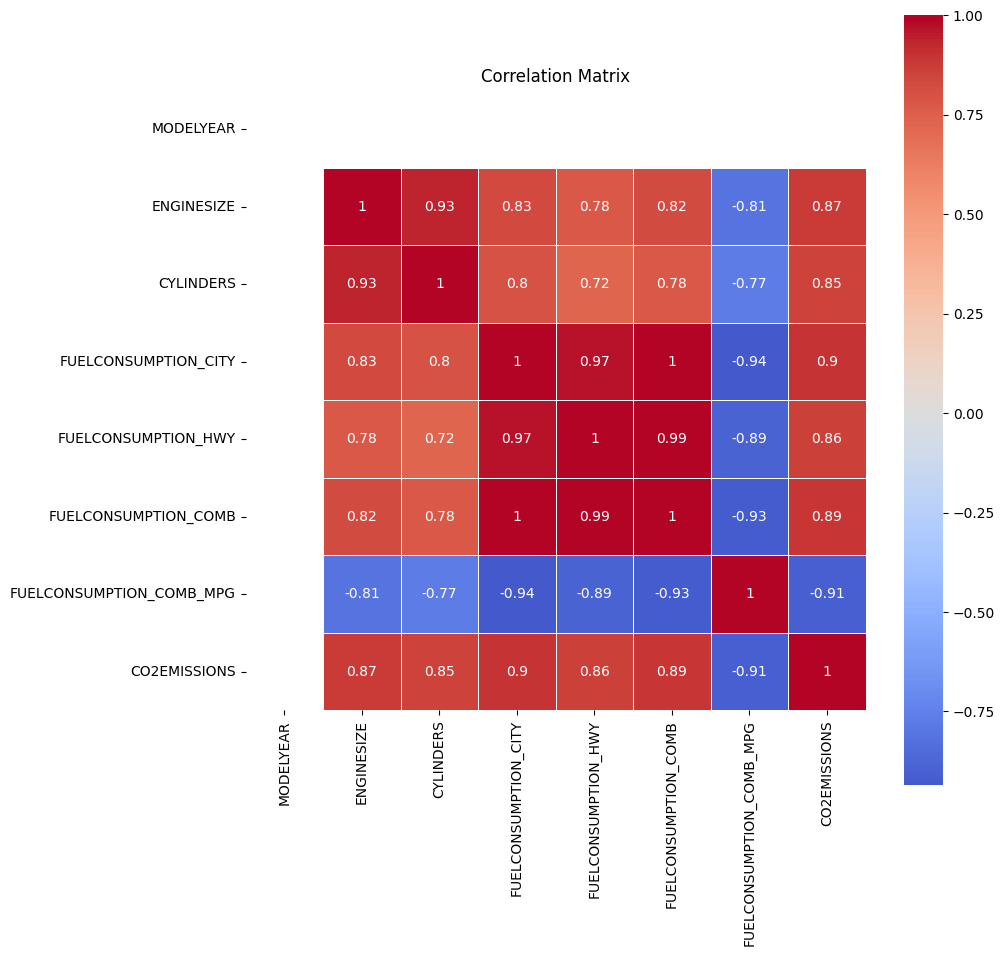

In [6]:

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

white boxes in the heatmap mean that some cells are missing values (NaN) in the correlation matrix.

This usually happens when:

A column has constant values, so its standard deviation is zero (e.g., MODELYEAR = 2014 for all rows).

There were still non-numeric or non-float-convertible values that caused a correlation to fail silently.

Some columns had NaN values or bad data types before calculating .corr().

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these fearues:

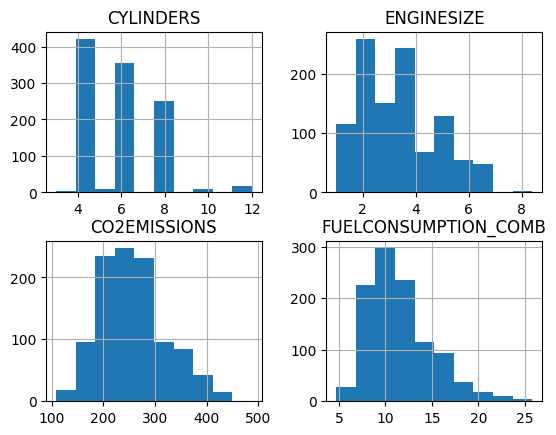

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

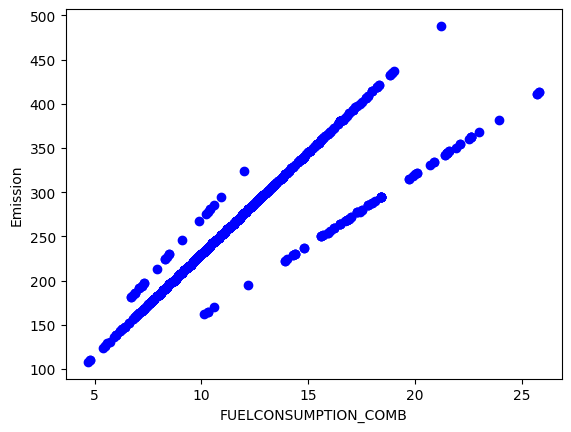

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

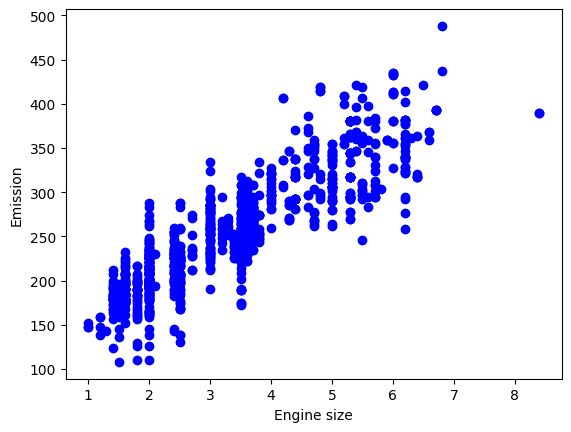

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

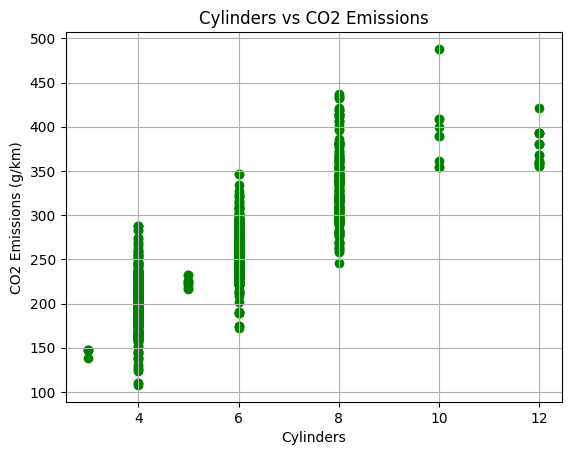

In [12]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Cylinders vs CO2 Emissions")
plt.grid(True)
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.



In [13]:
# Note: this is another way of splitting the data 
# instead of using " sklearn.model_selection --> train_test_split that used in the Tutoril example
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

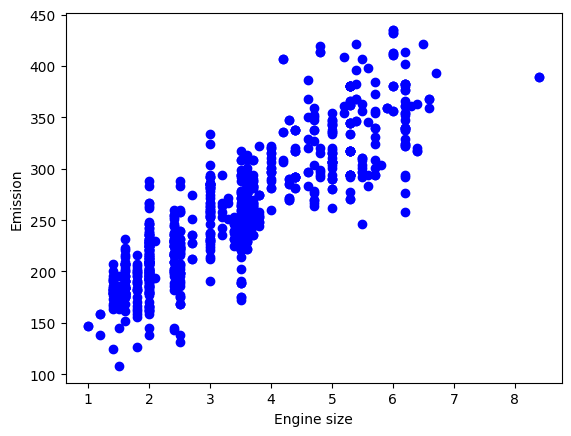

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.37737771]]
Intercept:  [127.80232805]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

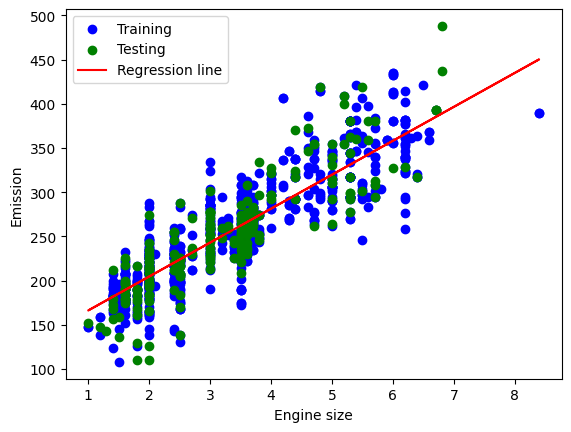

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend(['Training','Testing','Regression line'])

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.54
Residual sum of squares (MSE): 989.79
R2-score: 0.63


# <center>2-Multiple Linear Regression</center>



In [19]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) # select only three features
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.07303627  7.34740778  9.49905235]]


In [22]:
y_pred= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 15.874810568797454
Mean Squared Error (MSE): 460.9676573187327
R-squared (R²): 0.8931451474654885


c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Practice
Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy? 

#### Train the model using new features


In [23]:
# Prepare training and testing data with new features
x_train_new = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test_new = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# Train the new multiple linear regression model
regr2 = linear_model.LinearRegression()
regr2.fit(x_train_new, y_train)

# Display the new coefficients
print("New Coefficients:", regr2.coef_)


New Coefficients: [[11.13317274  6.97036815  6.19464065  3.00042203]]


#### Predict using the new mode

In [25]:
# Predict CO2 emissions using the new model
y_pred_new = regr2.predict(x_test_new)


#### Evaluate

In [26]:
# Calculate evaluation metrics
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

# Display metrics
print(f"New MAE: {mae_new}")
print(f"New MSE: {mse_new}")
print(f"New R²: {r2_new}")


New MAE: 15.845932112547866
New MSE: 461.44915176247747
New R²: 0.8930335343903286




The performance of both models:

| Metric        | Old Model (`COMB`) | New Model (`CITY`, `HWY`) |
|---------------|--------------------|----------------------------|
| MAE           | 15.87              | 15.85                      |
| MSE           | 460.97             | 461.45                     |
| R² Score      | 0.8931             | 0.8930                     |

 
There’s almost no difference between the two models. The numbers are very close,and the tiny changes in MAE or R² don’t really affect the overall performance. This means both models work similarly, and using just [[`FUELCONSUMPTION_COMB`]] is already good enough.




# <center>3-Polynomial Regression</center>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝜃_1𝑥+𝜃_2𝑥2

Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1, 𝑥
, and 𝑥2

.

PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]], shape=(877, 3))

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\
\[ 1 & v\_2 & v\_2^2]\\
\vdots & \vdots & \vdots\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\
\[ 1 & 2.4 & 5.76]\\
\[ 1 & 1.5 & 2.25]\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the 𝑥 with 𝑥_1, 𝑥_12 with 𝑥_2

, and so on. Then the 2nd degree equation would be turn into:

𝑦=𝑏+𝜃_1𝑥_1+𝜃_2𝑥_2

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

so we can use LinearRegression() function to solve it:

In [29]:
# Train
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         46.60897185 -0.94652725]]
Intercept:  [113.20707888]


In [30]:
# Predict

test_x_poly = poly.transform(test_x)
y_pred2 = clf.predict(test_x_poly)

Text(0, 0.5, 'Emission')

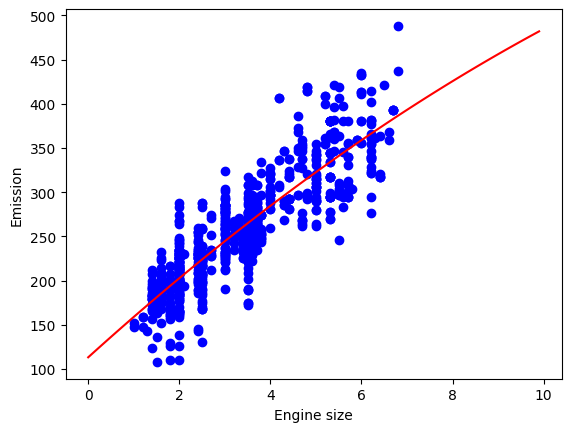

In [31]:
# plot the predected curve
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [32]:
# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_y, y_pred2)
mse = mean_squared_error(test_y, y_pred2)
r2 = r2_score(test_y, y_pred2)
# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 23.16427533439723
Mean Squared Error (MSE): 889.4564857541559
R-squared (R²): 0.7938190671034244


<h2 id="practice">Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?


#### Train the model with degree 3

In [33]:
# Create cubic polynomial features (degree = 3)
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

# Train linear regression model on cubic features
clf3 = linear_model.LinearRegression()
clf3.fit(train_x_poly3, train_y)

# Show coefficients
print("Coefficients:", clf3.coef_)
print("Intercept:", clf3.intercept_)


Coefficients: [[ 0.         33.49971862  2.86214089 -0.33385694]]
Intercept: [126.52068398]


#### Predict and visualize cubic curve

Text(0, 0.5, 'Emission')

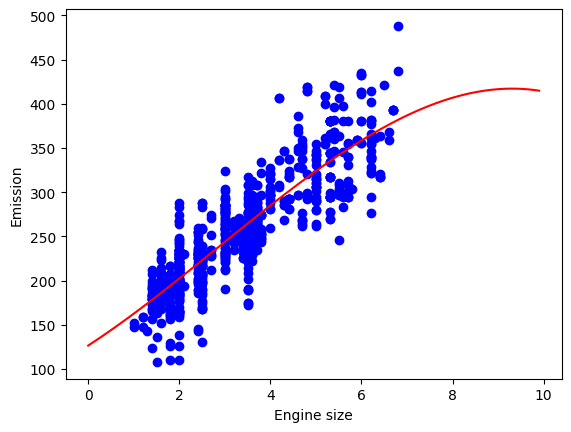

In [34]:
# Transform test data and make predictions
test_x_poly3 = poly3.transform(test_x)
y_pred3 = clf3.predict(test_x_poly3)

# Plot the curve
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
YY = (clf3.intercept_[0] 
      + clf3.coef_[0][1]*XX 
      + clf3.coef_[0][2]*np.power(XX, 2) 
      + clf3.coef_[0][3]*np.power(XX, 3))
plt.plot(XX, YY, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


#### Evaluate cubic model

In [35]:
# Evaluation metrics for cubic model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae3 = mean_absolute_error(test_y, y_pred3)
mse3 = mean_squared_error(test_y, y_pred3)
r2_3 = r2_score(test_y, y_pred3)

print(f"MAE (Cubic): {mae3}")
print(f"MSE (Cubic): {mse3}")
print(f"R² (Cubic): {r2_3}")


MAE (Cubic): 22.920724209632503
MSE (Cubic): 868.3304694077356
R² (Cubic): 0.7987161945385008


###  Polynomial Regression (Degree 3) – Summary



| Metric        | Degree 2 | Degree 3 |
|---------------|----------|----------|
| MAE           | 23.16    | 22.92    |
| MSE           | 889.46   | 868.33   |
| R² Score      | 0.7938   | 0.7987   |

The cubic model gave slightly better results. MAE and MSE are a bit lower, and R² is a bit higher. The improvement is small, but it shows that the cubic curve fits the data a little better than the quadratic one.
